# Test AGDC API Functions

Fei Zhang

2016 October

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import math
import pandas

import sys

sys.path.insert(0, '/g/data/u46/fxz547/Githubz/agdc-v2') 
#sys.path.insert(0, '/home/547/fxz547/myGithub/agdc-v2')  #prepend a path

In [2]:
# import AGDC Python API modules

import datacube
from datacube.storage import masking

# Create an API data access object
dc = datacube.Datacube(app='GetData')

dc

Datacube<index=Index<db=PostgresDb<engine=Engine(postgresql://fxz547@130.56.244.227:6432/datacube)>>>

In [3]:
dc.list_products().head()

name                                        description  \
id                                                                          
36  bom_rainfall_grids  Interpolated Rain Gauge Precipitation 1-Day Au...   
32            dsm1sv10                               DSM 1sec Version 1.0   
42       ls5_fc_albers  Landsat 5 Fractional Cover 25 metre, 100km til...   
2     ls5_level1_scene      Landsat 5 Level 1 At-sensor Radiance 25 metre   
6      ls5_nbar_albers  Landsat 5 Surface Reflectance NBAR 25 metre, 1...   

        product_type  sat_path   format  lon   platform  sat_row  instrument  \
id                                                                             
36          rainfall       NaN   NETCDF  NaN        BoM      NaN  rain gauge   
32               DEM       NaN     ENVI  NaN       SRTM      NaN         SIR   
42  fractional_cover       NaN   NetCDF  NaN  LANDSAT_5      NaN          TM   
2             level1       NaN  GeoTiff  NaN  LANDSAT_5      NaN          TM   
6               nbar       NaN   NetCDF  NaN  LANDSAT_5      NaN          TM   

    time  lat        crs                             resolution  \
id                                                                
36  None  NaN  EPSG:4326                          [-0.05, 0.05]   
32  None  NaN  EPSG:4326  [-0.00027777777778, 0.00027777777778]   
42  None  NaN  EPSG:3577                              [-25, 25]   
2   None  NaN        NaN                                    NaN   
6   None  NaN  EPSG:3577                              [-25, 25]   

               tile_size     spatial_dimensions  
id                                               
36                  None  (latitude, longitude)  
32                  None  (latitude, longitude)  
42  [100000.0, 100000.0]                 (y, x)  
2                    NaN                    NaN  
6   [100000.0, 100000.0]                 (y, x)

In [4]:
from datacube.api.query import query_group_by, query_geopolygon
from datacube.model import GeoBox
from datacube.helpers import ga_pq_fuser
from datacube.storage.masking import make_mask
# from tqdm import trange
# import tqdm

def load_masked_data(dc, name, **kwargs):
    data = dc.load(product='%s_nbar_albers' % name, group_by='solar_day', **kwargs)
    pq = dc.load(product='%s_pq_albers' % name, like=data, fuse_func=ga_pq_fuser, group_by='solar_day')
    mask = make_mask(pq.pixelquality, ga_good_pixel=True)
    data = data.where(mask)
    data.attrs['crs'] = pq.attrs['crs']
    return data

In [5]:
# image color schem
acmap='winter'

#AOI_NAME="Woodland"; self.xp = (147.35, 147.45); self.yp = (-22.92, -22.82)
qdict_woodland = {
            'time': ('2013-01-01', '2016-01-01'),
            'lat': (-22.92, -22.82),
            'lon': (147.35, 147.45)
        }


#AOI_NAME='Farmland'; xp=(148.14, 148.24); yp=(-30.15, -30.05)
AOI_NAME = 'Farmland'; 
qdict_farmland = {
            'time': ('2013-01-01', '2016-01-01'),
            'lat': (-30.15, -30.05),
            'lon': (148.14, 148.24)
        }

#AOI_NAME = 'FireScarNT';  xp = (132.50, 132.60);    yp = (-19.65, -19.55)
AOI_NAME = 'Firescar';
qdict = {
            'time': ('2013-01-01', '2016-01-01'),
            'lat': (-19.65, -19.55),
            'lon': (132.50, 132.60)
        }

In [6]:
data= load_masked_data(dc, 'ls8', **qdict)

In [7]:
data

<xarray.Dataset>
Dimensions:          (time: 69, x: 421, y: 447)
Coordinates:
  * y                (y) float64 -2.094e+06 -2.094e+06 -2.094e+06 -2.094e+06 ...
  * x                (x) float64 5.224e+04 5.226e+04 5.229e+04 5.231e+04 ...
  * time             (time) datetime64[ns] 2013-03-20 2013-04-14 2013-04-21 ...
Data variables:
    coastal_aerosol  (time, y, x) float64 511.0 496.0 502.0 508.0 516.0 ...
    blue             (time, y, x) float64 551.0 538.0 537.0 545.0 547.0 ...
    green            (time, y, x) float64 1.078e+03 1.054e+03 1.058e+03 ...
    red              (time, y, x) float64 1.93e+03 1.876e+03 1.888e+03 ...
    nir              (time, y, x) float64 3.203e+03 3.142e+03 3.139e+03 ...
    swir1            (time, y, x) float64 3.541e+03 3.48e+03 3.503e+03 ...
    swir2            (time, y, x) float64 3.017e+03 2.954e+03 2.984e+03 ...
Attributes:
    crs: EPSG:3577

In [8]:
data.time.values

array(['2013-03-20T11:00:00.000000000+1100',
       '2013-04-14T10:00:00.000000000+1000',
       '2013-04-21T10:00:00.000000000+1000',
       '2013-05-16T10:00:00.000000000+1000',
       '2013-05-23T10:00:00.000000000+1000',
       '2013-06-01T10:00:00.000000000+1000',
       '2013-06-08T10:00:00.000000000+1000',
       '2013-06-24T10:00:00.000000000+1000',
       '2013-07-10T10:00:00.000000000+1000',
       '2013-07-26T10:00:00.000000000+1000',
       '2013-08-11T10:00:00.000000000+1000',
       '2013-08-27T10:00:00.000000000+1000',
       '2013-09-05T10:00:00.000000000+1000',
       '2013-09-12T10:00:00.000000000+1000',
       '2013-09-28T10:00:00.000000000+1000',
       '2013-10-30T11:00:00.000000000+1100',
       '2013-11-15T11:00:00.000000000+1100',
       '2013-12-01T11:00:00.000000000+1100',
       '2013-12-10T11:00:00.000000000+1100',
       '2013-12-17T11:00:00.000000000+1100',
       '2014-01-02T11:00:00.000000000+1100',
       '2014-01-18T11:00:00.000000000+1100',
       '20

In [9]:
ndvi = ((data.nir - data.red) / (data.nir + data.red))

In [10]:
ndvi

<xarray.DataArray (time: 69, y: 447, x: 421)>
array([[[ 0.24800312,  0.25229175,  0.24885618, ...,  0.30346821,
          0.3061651 ,  0.29271523],
        [ 0.24726135,  0.24965626,  0.2484252 , ...,  0.29212292,
          0.29733472,  0.29091528],
        [ 0.25035361,  0.24930195,  0.24484587, ...,  0.28761372,
          0.28114127,  0.29078498],
        ..., 
        [ 0.28639133,  0.28555072,  0.27147   , ...,  0.24414927,
          0.26702566,  0.26865172],
        [ 0.27145582,  0.27314912,  0.27056828, ...,  0.25427949,
          0.26299213,  0.26497335],
        [ 0.26577127,  0.2769168 ,  0.28416667, ...,  0.25649448,
          0.24893746,  0.2755857 ]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ..., 
      

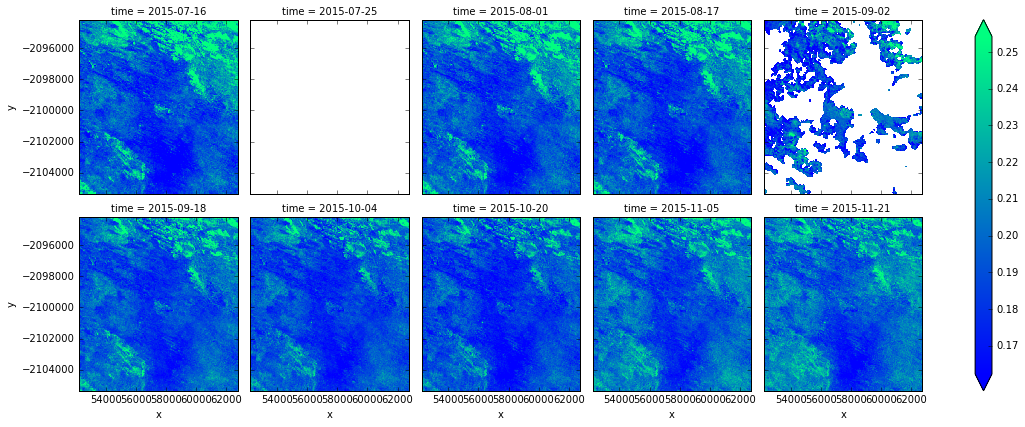

In [11]:
ndvi[-10:].plot(col='time', col_wrap=5, robust=True, cmap=acmap)

In [12]:
MASK_FLAGS = {
    'contiguous': True,
    'cloud_acca': 'no_cloud',
    'cloud_fmask': 'no_cloud',
    'cloud_shadow_acca': 'no_cloud_shadow',
    'cloud_shadow_fmask': 'no_cloud_shadow',
    'blue_saturated': False,
    'green_saturated': False,
    'red_saturated': False,
    'nir_saturated': False,
    'swir1_saturated': False,
    'swir2_saturated': False
}

In [13]:
pq = dc.load(product='ls8_pq_albers', like=data, fuse_func=ga_pq_fuser, group_by='solar_day')
mask = make_mask(pq, **MASK_FLAGS)

In [14]:
mask

<xarray.Dataset>
Dimensions:       (time: 68, x: 421, y: 447)
Coordinates:
  * y             (y) float64 -2.094e+06 -2.094e+06 -2.094e+06 -2.094e+06 ...
  * x             (x) float64 5.224e+04 5.226e+04 5.229e+04 5.231e+04 ...
  * time          (time) datetime64[ns] 2013-03-20 2013-04-14 2013-04-21 ...
Data variables:
    pixelquality  (time, y, x) bool True True True True True True True True ...
Attributes:
    crs: EPSG:3577

In [15]:
cloudfreeRatio=0.5
pqmask =mask.pixelquality  
mostly_cloud_free = pqmask.sum(dim=('x', 'y')) > (cloudfreeRatio * pqmask.size / pqmask.time.size)

In [16]:
# Apply the time-dim mask to the 3D-array (time, x, y)
mostly_good_ndvi = ndvi.where(mostly_cloud_free).dropna('time', how='all')
# mostly_good_ndvi.plot(col='time', col_wrap=5)

print(mostly_good_ndvi)

<xarray.DataArray (time: 38, y: 447, x: 421)>
array([[[ 0.24800312,  0.25229175,  0.24885618, ...,  0.30346821,
          0.3061651 ,  0.29271523],
        [ 0.24726135,  0.24965626,  0.2484252 , ...,  0.29212292,
          0.29733472,  0.29091528],
        [ 0.25035361,  0.24930195,  0.24484587, ...,  0.28761372,
          0.28114127,  0.29078498],
        ..., 
        [ 0.28639133,  0.28555072,  0.27147   , ...,  0.24414927,
          0.26702566,  0.26865172],
        [ 0.27145582,  0.27314912,  0.27056828, ...,  0.25427949,
          0.26299213,  0.26497335],
        [ 0.26577127,  0.2769168 ,  0.28416667, ...,  0.25649448,
          0.24893746,  0.2755857 ]],

       [[ 0.23612454,  0.24786664,  0.24279181, ...,  0.25920471,
          0.27193933,  0.27470289],
        [ 0.23605984,  0.23669441,  0.24445317, ...,  0.25406578,
          0.2562921 ,  0.26896067],
        [ 0.23797931,  0.23460701,  0.23452897, ...,  0.24449183,
          0.24585538,  0.25185972],
        ..., 
      

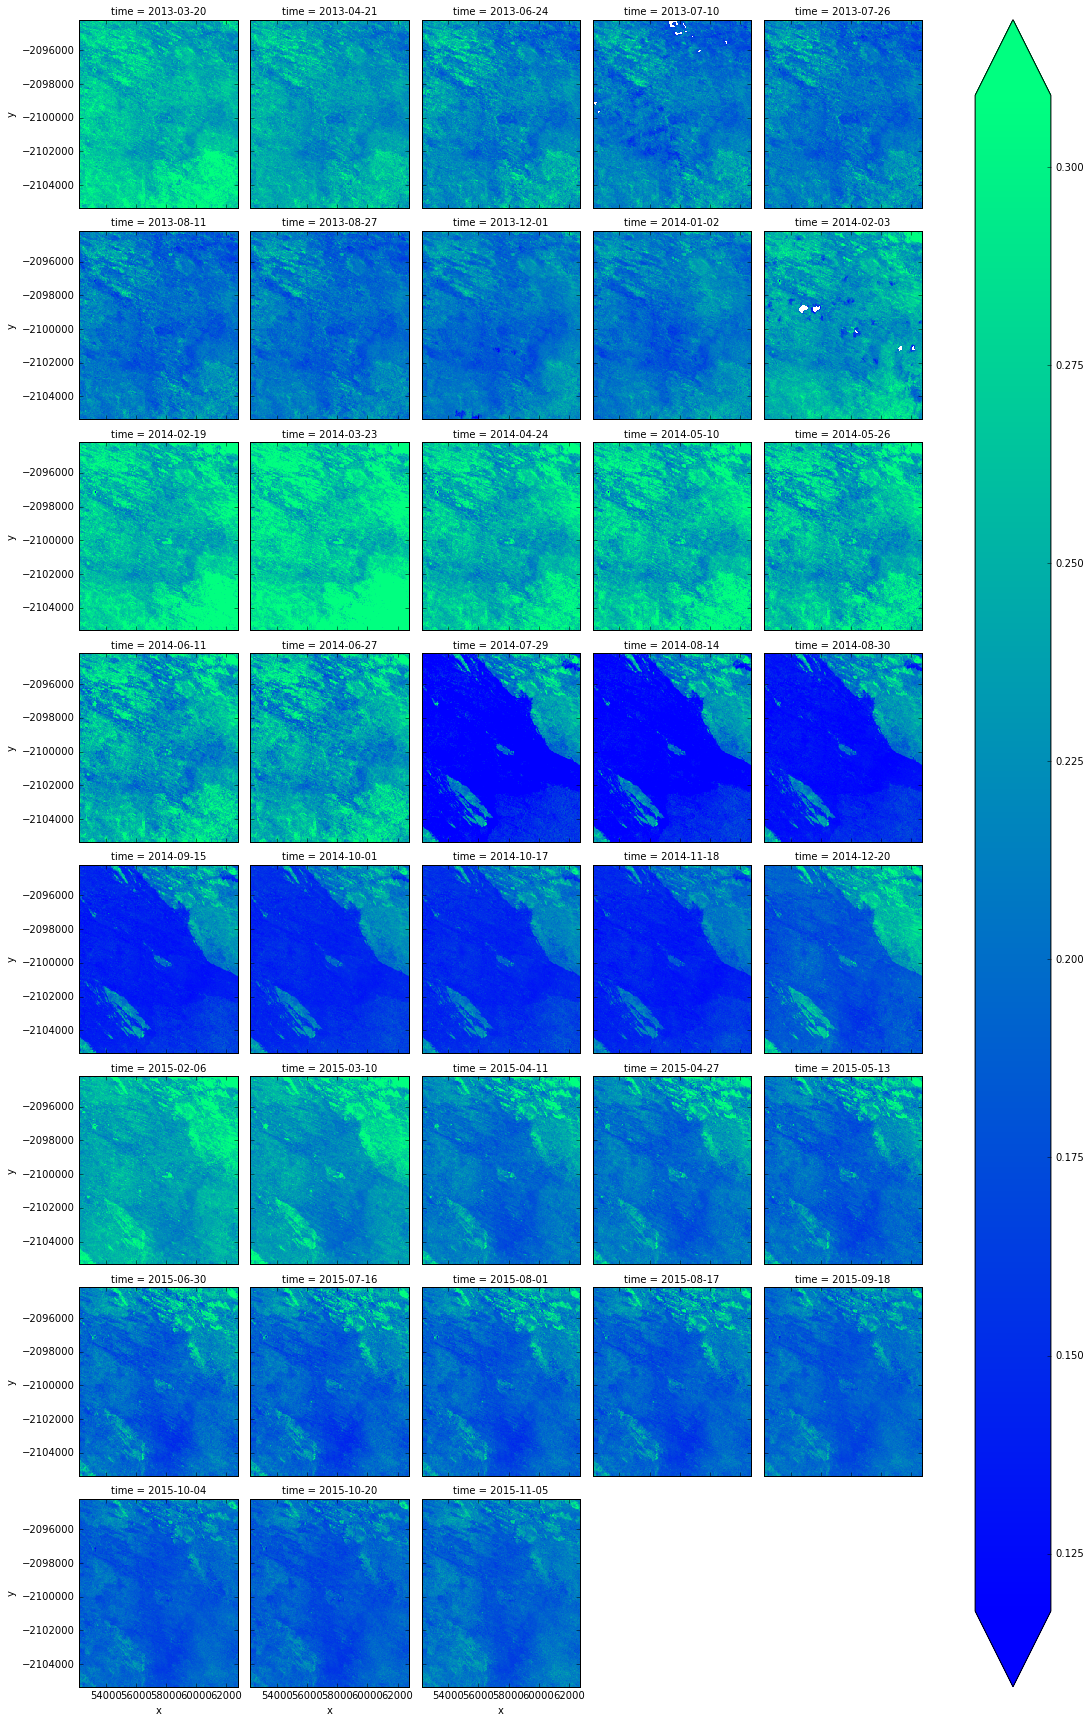

In [17]:
mostly_good_ndvi.plot(col='time', col_wrap=5,robust=True, cmap=acmap)

In [18]:
startdate=str(mostly_good_ndvi.time.min().values)[:10]
stopdate=str(mostly_good_ndvi.time.max().values)[:10]

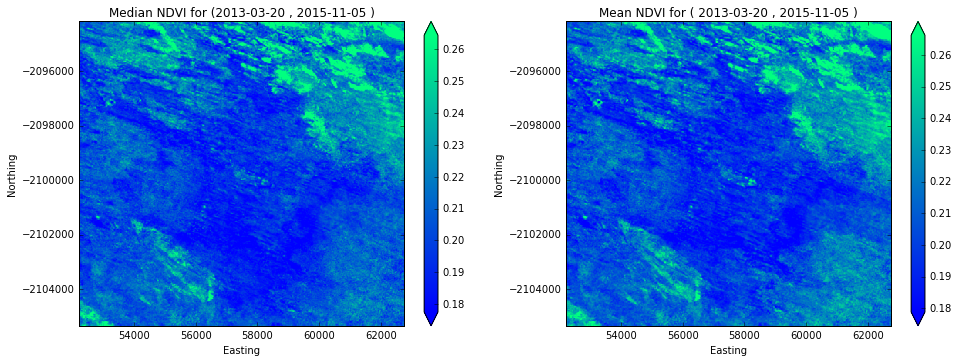

In [19]:
plt.figure( figsize=(16,12) )
    
plt.subplot( 2,2,1 )
mostly_good_ndvi.median(dim='time').plot(robust=True, cmap=acmap)
plt.title("Median NDVI for (%s , %s )"%(startdate, stopdate)); 
plt.xlabel('Easting'); plt.ylabel('Northing')


plt.subplot( 2,2,2 )
mostly_good_ndvi.mean(dim='time').plot(robust=True, cmap=acmap)
# ndvi.mean(dim='time').plot()
plt.title("Mean NDVI for ( %s , %s )"%(startdate, stopdate))
plt.xlabel('Easting'); plt.ylabel('Northing')

# #------------------------------
# plt.subplot( 2,2,3 )
# mostly_good_ndwi.median(dim='time').plot()
# plt.title("Median Normalised Difference Water Index - NDWI"); plt.xlabel('easting'); plt.ylabel('northing')


# plt.subplot( 2,2,4 )
# mostly_good_ndwi.mean(dim='time').plot()
# # ndwi.mean(dim='time').plot()
# plt.title("Mean Normalised Difference Water Index - NDWI"); plt.xlabel('easting'); plt.ylabel('northing')

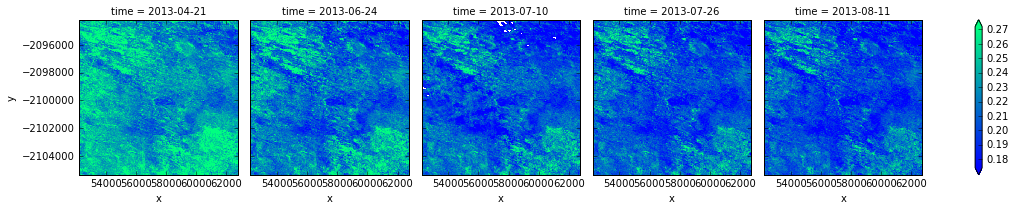

In [20]:
# try to get a subset of ndvi whose average are lower 20%. And the corresponding bands. They can then be synthentized.
# a list of times as selection criteria?
# https://www.google.com.au/webhp?sourceid=chrome-instant&ion=1&espv=2&ie=UTF-8#q=xarray.DataArray+slicing
alist=[1,2,3,4,5]
subset_ndvi=mostly_good_ndvi.isel(time=alist)

subset_ndvi.plot(col='time', col_wrap=5,robust=True, cmap=acmap)


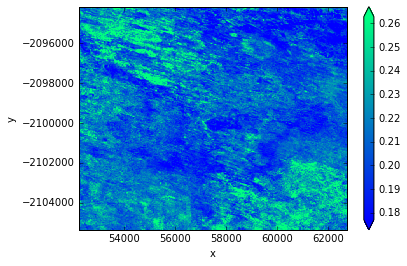

In [21]:
subset_ndvi.median(dim='time').plot(robust=True, cmap=acmap)

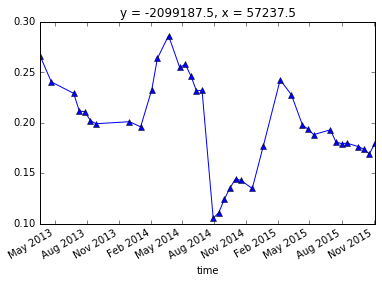

In [22]:
mostly_good_ndvi.isel(x=[200], y=[200]).plot(marker='^')

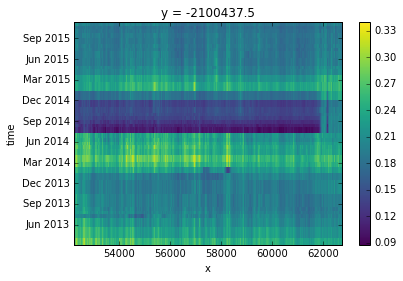

In [23]:

mostly_good_ndvi.isel(y=250).plot()

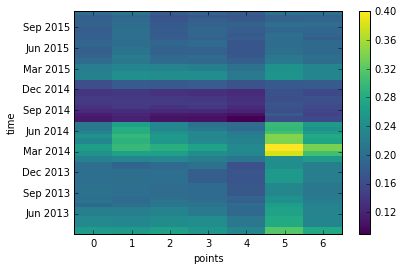

In [24]:
#A line shapefile with pairs of coordinates (using sel_points instead of isel_points) 
# would be able to be interpolated into something less blocky for the next plot.

mostly_good_ndvi.isel_points(x=[0, 100, 200, 300, 300, 400,420], 
                             y=[200, 200, 200, 250, 300, 400,420]).plot(x='points', y='time')

In [25]:
mostly_cloud_free

<xarray.DataArray 'pixelquality' (time: 68)>
array([ True, False,  True, False, False, False, False,  True,  True,
        True,  True,  True, False, False, False, False, False,  True,
       False, False,  True, False,  True,  True,  True, False,  True,
        True,  True, False,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True, False,  True, False, False,  True,
       False,  True, False,  True, False,  True, False,  True, False,
       False, False, False,  True, False,  True, False,  True,  True,
       False,  True,  True,  True,  True], dtype=bool)
Coordinates:
  * time     (time) datetime64[ns] 2013-03-20 2013-04-14 2013-04-21 ...

In [26]:
ndvi_mean = mostly_good_ndvi.mean(dim=['x', 'y'])  # average over the image pixels

pdser = ndvi_mean.to_pandas()  # pd.Series

df = pdser.to_frame(name='NDVI')  # convert to dataframe

        # df['PROD_TYPE'] = self.prod_type  # add a new column

df.sort_index()


NDVI
time                
2013-03-20  0.260915
2013-04-21  0.238060
2013-06-24  0.222370
2013-07-10  0.210419
2013-07-26  0.208461
2013-08-11  0.205096
2013-08-27  0.204191
2013-12-01  0.206445
2014-01-02  0.208957
2014-02-03  0.241232
2014-02-19  0.269975
2014-03-23  0.287160
2014-04-24  0.259334
2014-05-10  0.263476
2014-05-26  0.256242
2014-06-11  0.244942
2014-06-27  0.243751
2014-07-29  0.146852
2014-08-14  0.150169
2014-08-30  0.157027
2014-09-15  0.164522
2014-10-01  0.167365
2014-10-17  0.166818
2014-11-18  0.160124
2014-12-20  0.199086
2015-02-06  0.250520
2015-03-10  0.240273
2015-04-11  0.213696
2015-04-27  0.212101
2015-05-13  0.203667
2015-06-30  0.204063
2015-07-16  0.199647
2015-08-01  0.199503
2015-08-17  0.197534
2015-09-18  0.196613
2015-10-04  0.191850
2015-10-20  0.189281
2015-11-05  0.200421

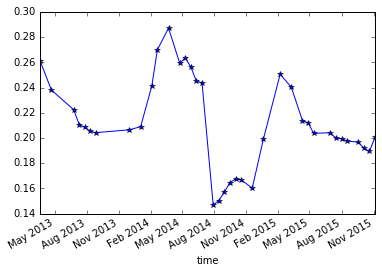

In [27]:
ndvi_mean.plot(marker='*')

# Further Filtering of images

In [28]:
# ndvi_mean.plot()
small20_ndvi=pdser.quantile(0.2)

In [29]:
ndvi_mean_mask= (ndvi_mean <= small20_ndvi)

In [30]:
ndvi_mean_mask

<xarray.DataArray (time: 38)>
array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True,  True,  True,  True,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False], dtype=bool)
Coordinates:
  * time     (time) datetime64[ns] 2013-03-20 2013-04-21 2013-06-24 ...

In [31]:
# Apply the time-dim mask to the 3D-array (time, x, y)
mostly_good_ndvi2 = mostly_good_ndvi.where(ndvi_mean_mask).dropna('time', how='all')

print(mostly_good_ndvi2)

<xarray.DataArray (time: 8, y: 447, x: 421)>
array([[[ 0.10383961,  0.104689  ,  0.10576385, ...,  0.19060331,
          0.20943953,  0.26927861],
        [ 0.11144076,  0.1065033 ,  0.10358786, ...,  0.17432099,
          0.20194175,  0.21557137],
        [ 0.10600502,  0.11354047,  0.10867546, ...,  0.16034483,
          0.15567282,  0.18642534],
        ..., 
        [ 0.19941492,  0.17913486,  0.17326124, ...,  0.15375897,
          0.15311909,  0.15183673],
        [ 0.22736072,  0.22051066,  0.20638439, ...,  0.15147059,
          0.15410574,  0.1518797 ],
        [ 0.21345029,  0.21088157,  0.21518987, ...,  0.14644351,
          0.14089098,  0.16437309]],

       [[ 0.11646884,  0.11606485,  0.11414528, ...,  0.19529837,
          0.21922366,  0.24497258],
        [ 0.11994059,  0.11969112,  0.11972344, ...,  0.19735756,
          0.22902848,  0.24518093],
        [ 0.11485452,  0.12035828,  0.11945266, ...,  0.15351812,
          0.16961826,  0.18656126],
        ..., 
       

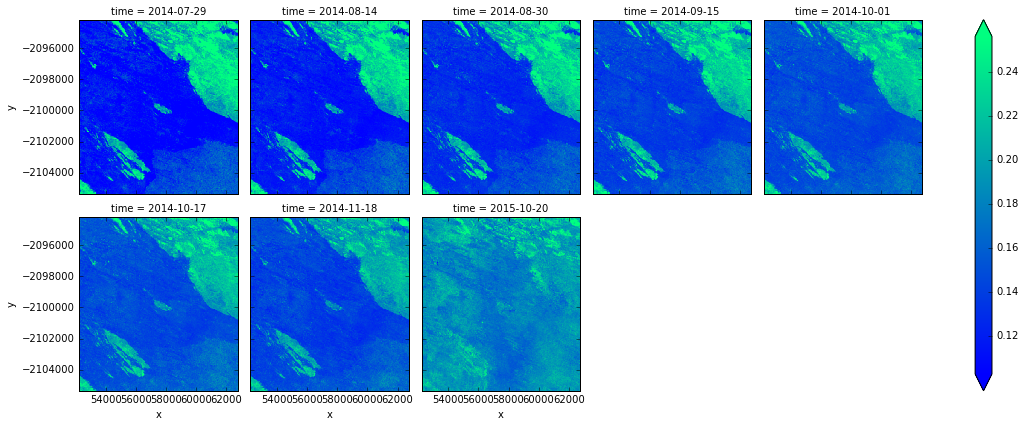

In [32]:
mostly_good_ndvi2.plot(col='time', col_wrap=5, robust=True, cmap=acmap)

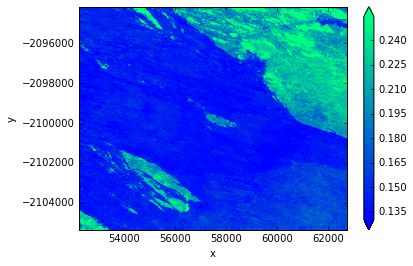

In [33]:

mostly_good_ndvi2.median(dim='time').plot(robust=True, cmap=acmap)

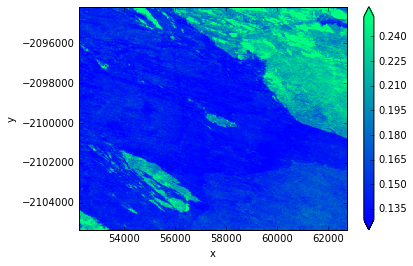

In [34]:
# cmap: http://matplotlib.org/examples/color/colormaps_reference.html

mostly_good_ndvi2.mean(dim='time').plot(robust=True, cmap=acmap)

In [35]:
data1 =data.where(mostly_cloud_free).dropna('time', how='all')

In [36]:
data2=data1.where(ndvi_mean_mask).dropna('time', how='all')

In [37]:
mostly_good_ndvi2_mask=(mostly_good_ndvi2 <= small20_ndvi)

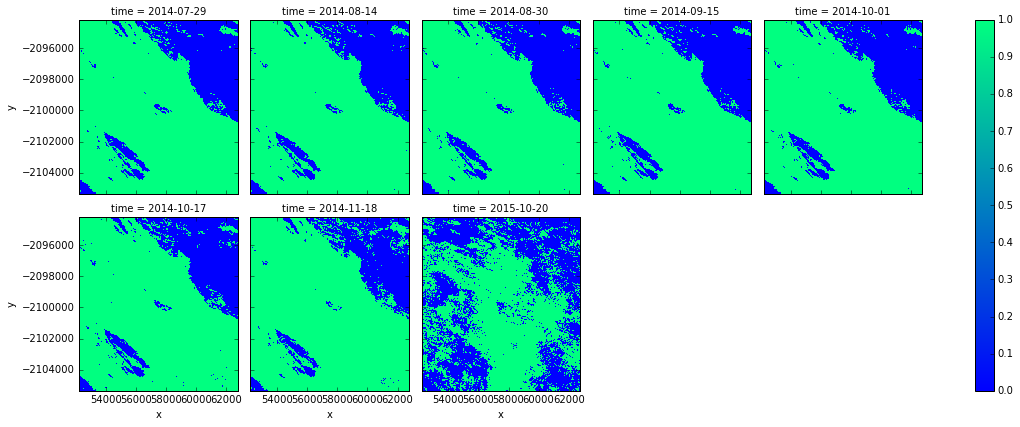

In [38]:
mostly_good_ndvi2_mask.plot(col='time', col_wrap=5, robust=True, cmap=acmap)

In [39]:
data2_maskoff_high_ndvi = data2.where(mostly_good_ndvi2_mask)

In [40]:
syndata2=data2_maskoff_high_ndvi.mean(dim='time', keep_attrs=True )

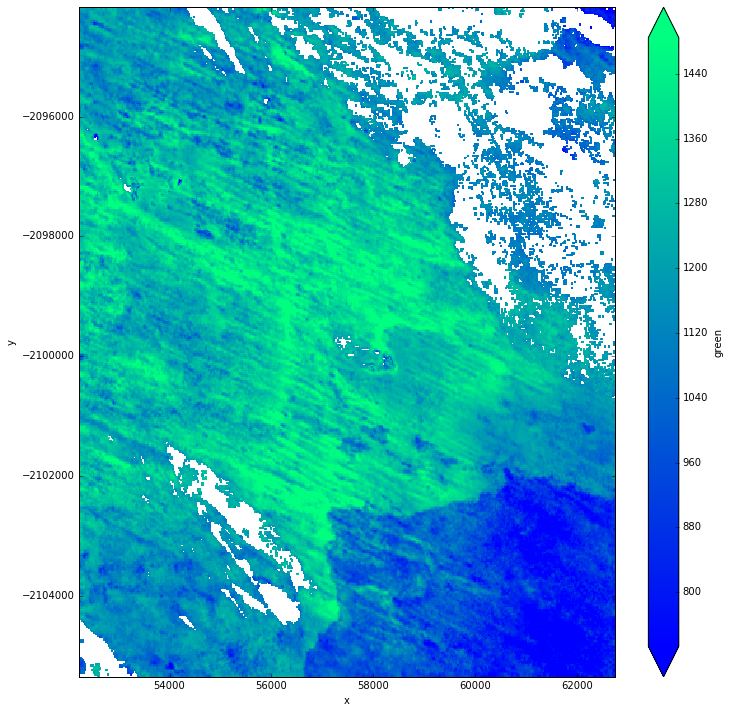

In [41]:
plt.figure(figsize=(12,12))
syndata2.green.plot(robust=True, cmap=acmap)


In [42]:
synndvi=(syndata2.nir- syndata2.red)/(syndata2.nir +syndata2.red)

('NDVI Low 20%', 0.19030869854308091)


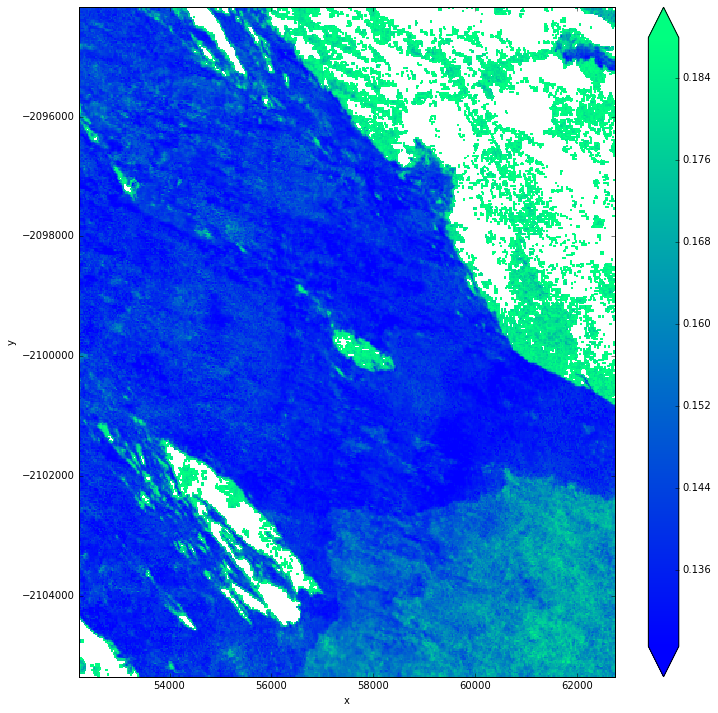

In [43]:
print("NDVI Low 20%",  small20_ndvi)
plt.figure(figsize=(12,12))
synndvi.plot(robust=True, cmap=acmap)

In [44]:
# here is a set of lowest average NDVI images.
data2

<xarray.Dataset>
Dimensions:          (time: 8, x: 421, y: 447)
Coordinates:
  * y                (y) float64 -2.094e+06 -2.094e+06 -2.094e+06 -2.094e+06 ...
  * x                (x) float64 5.224e+04 5.226e+04 5.229e+04 5.231e+04 ...
  * time             (time) datetime64[ns] 2014-07-29 2014-08-14 2014-08-30 ...
Data variables:
    coastal_aerosol  (time, y, x) float64 597.0 596.0 601.0 607.0 604.0 ...
    blue             (time, y, x) float64 632.0 618.0 629.0 648.0 632.0 ...
    green            (time, y, x) float64 1.225e+03 1.196e+03 1.225e+03 ...
    red              (time, y, x) float64 2.369e+03 2.339e+03 2.397e+03 ...
    nir              (time, y, x) float64 2.918e+03 2.886e+03 2.964e+03 ...
    swir1            (time, y, x) float64 4.236e+03 4.143e+03 4.221e+03 ...
    swir2            (time, y, x) float64 4.333e+03 4.238e+03 4.271e+03 ...
Attributes:
    crs: EPSG:3577

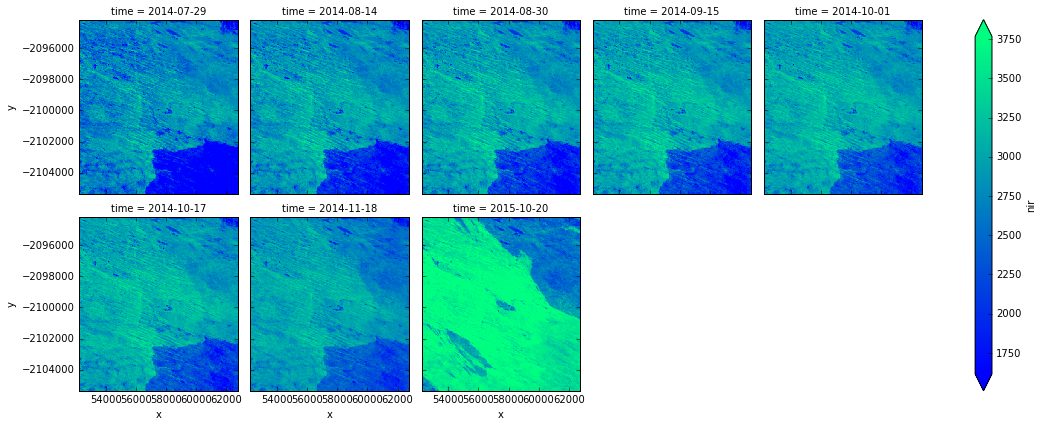

In [45]:
data2.nir.plot(col='time', col_wrap=5,robust=True, cmap=acmap)

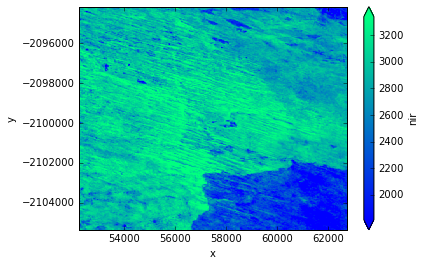

In [46]:
data2.nir.median(dim='time').plot(robust=True, cmap=acmap)

In [47]:
import rasterio

DEFAULT_PROFILE = {
    'blockxsize': 256,
    'blockysize': 256,
    'compress': 'lzw',
    'driver': 'GTiff',
    'interleave': 'band',
    'nodata': -999,  #0.0,
    'photometric': 'RGA',    #'RGBA',
    'tiled': True}


def write_geotiff(filename, dataset, time_index=None, profile_override=None):
    """
    Write an xarray dataset to a geotiff filename

    :attr bands: ordered list of dataset names
    :attr time_index: the time index of data slice to be output to file
    :attr dataset: xarray dataset containing multiple bands to write to file
    :attr profile_override: option dict, overrides rasterio file creation options.
    """
    profile_override = profile_override or {}

    dtypes = {val.dtype for val in dataset.data_vars.values()}
    assert len(dtypes) == 1  # Check for multiple dtypes

    profile = DEFAULT_PROFILE.copy()
    profile.update({
        'width': dataset.dims[dataset.crs.dimensions[1]],
        'height': dataset.dims[dataset.crs.dimensions[0]],
        'affine': dataset.affine,
        'crs': dataset.crs.crs_str,
        'count': len(dataset.data_vars),
        'dtype': str(dtypes.pop()),
        'nodata': -999 #dataset.red.nodata
    })
    profile.update(profile_override)
    
    with rasterio.open(filename, 'w', **profile) as dest:
        for bandnum, data in enumerate(dataset.data_vars.values(), start=1):
            if time_index is None:
                #print(data.data)  # pure 2D numeric matrix
                dest.write(data.data, bandnum)
            else:
                dest.write(data.isel(time=time_index).data, bandnum)



In [48]:
# export dataset of xarray.Dataset
import os

def export_datasets(ds, fn_prefix):
    """
    loop over every datasets in ds, output geotiff and rgb image
    see the filtered version below
    """
    for itime in xrange (0,len(ds.time)):
        #fntime=str(ds.time.values[itime])[:19].replace(':','')
        fntime=str(ds.time.values[itime])[:10].replace(':','')
        #fntime='yyyy-mm-dd'
        fname ="%s_%s.tiff"%(fn_prefix,fntime)
        fname2="%s_%s.png"%(fn_prefix,fntime)
        
        path2fname=os.path.join("/short/v10/fxz547/LowNDVI",fname)
        path2fname2 =os.path.join("/short/v10/fxz547/LowNDVI",fname2)

        write_geotiff(path2fname,ds, itime)
        
        #make_rgb_images(ds, itime, path2fname2 )
        
        

In [49]:

fnpref = '%s_%s_nbar' % (AOI_NAME, 'ls8')

export_datasets(data2, fnpref)

In [50]:
# This is the new subset of lower-NDVI images
data2


<xarray.Dataset>
Dimensions:          (time: 8, x: 421, y: 447)
Coordinates:
  * y                (y) float64 -2.094e+06 -2.094e+06 -2.094e+06 -2.094e+06 ...
  * x                (x) float64 5.224e+04 5.226e+04 5.229e+04 5.231e+04 ...
  * time             (time) datetime64[ns] 2014-07-29 2014-08-14 2014-08-30 ...
Data variables:
    coastal_aerosol  (time, y, x) float64 597.0 596.0 601.0 607.0 604.0 ...
    blue             (time, y, x) float64 632.0 618.0 629.0 648.0 632.0 ...
    green            (time, y, x) float64 1.225e+03 1.196e+03 1.225e+03 ...
    red              (time, y, x) float64 2.369e+03 2.339e+03 2.397e+03 ...
    nir              (time, y, x) float64 2.918e+03 2.886e+03 2.964e+03 ...
    swir1            (time, y, x) float64 4.236e+03 4.143e+03 4.221e+03 ...
    swir2            (time, y, x) float64 4.333e+03 4.238e+03 4.271e+03 ...
Attributes:
    crs: EPSG:3577

In [51]:
# bands synthetic image constructed from a set data2

#OK syn_band= data2.median(dim='time', keep_attrs=True )

syn_band= data2.mean(dim='time', keep_attrs=True )

# min() func does not make sense here:  syn_band= data2.min(dim='time', keep_attrs=True )

In [52]:
syn_band

<xarray.Dataset>
Dimensions:          (x: 421, y: 447)
Coordinates:
  * y                (y) float64 -2.094e+06 -2.094e+06 -2.094e+06 -2.094e+06 ...
  * x                (x) float64 5.224e+04 5.226e+04 5.229e+04 5.231e+04 ...
Data variables:
    coastal_aerosol  (y, x) float64 596.8 596.6 599.0 600.5 597.1 589.6 ...
    blue             (y, x) float64 635.8 634.6 638.2 644.0 633.4 627.1 ...
    green            (y, x) float64 1.215e+03 1.212e+03 1.222e+03 1.241e+03 ...
    red              (y, x) float64 2.311e+03 2.306e+03 2.341e+03 2.377e+03 ...
    nir              (y, x) float64 3.079e+03 3.075e+03 3.11e+03 3.128e+03 ...
    swir1            (y, x) float64 4.089e+03 4.05e+03 4.11e+03 4.164e+03 ...
    swir2            (y, x) float64 3.94e+03 3.902e+03 3.951e+03 4.019e+03 ...
Attributes:
    crs: EPSG:3577

In [53]:
syn_band.data_vars.keys() #.values()


[u'coastal_aerosol', u'blue', u'green', u'red', u'nir', u'swir1', u'swir2']

In [54]:
syn_band.blue.data

array([[ 635.75 ,  634.625,  638.25 , ...,  446.125,  509.5  ,  581.125],
       [ 629.25 ,  632.75 ,  635.375, ...,  444.875,  461.5  ,  514.625],
       [ 607.75 ,  616.875,  626.   , ...,  471.   ,  460.125,  472.25 ],
       ..., 
       [ 615.125,  615.5  ,  622.   , ...,  512.75 ,  503.25 ,  490.375],
       [ 631.375,  636.75 ,  632.875, ...,  518.375,  508.875,  505.75 ],
       [ 634.5  ,  639.875,  636.875, ...,  528.375,  522.25 ,  500.5  ]])

In [55]:
syn_band.data_vars.values()[1].data  # blue  index=1, coastal_aerosol=0

array([[ 635.75 ,  634.625,  638.25 , ...,  446.125,  509.5  ,  581.125],
       [ 629.25 ,  632.75 ,  635.375, ...,  444.875,  461.5  ,  514.625],
       [ 607.75 ,  616.875,  626.   , ...,  471.   ,  460.125,  472.25 ],
       ..., 
       [ 615.125,  615.5  ,  622.   , ...,  512.75 ,  503.25 ,  490.375],
       [ 631.375,  636.75 ,  632.875, ...,  518.375,  508.875,  505.75 ],
       [ 634.5  ,  639.875,  636.875, ...,  528.375,  522.25 ,  500.5  ]])

In [56]:
filename=os.path.join("/short/v10/fxz547/LowNDVI", AOI_NAME+'_ls8_nbar_synthetic2.tiff')

write_geotiff(filename, syn_band ) #, time_index=None, profile_override=None)


In [57]:
syn_ndvi= (syn_band.nir - syn_band.red )/  (syn_band.nir + syn_band.red )

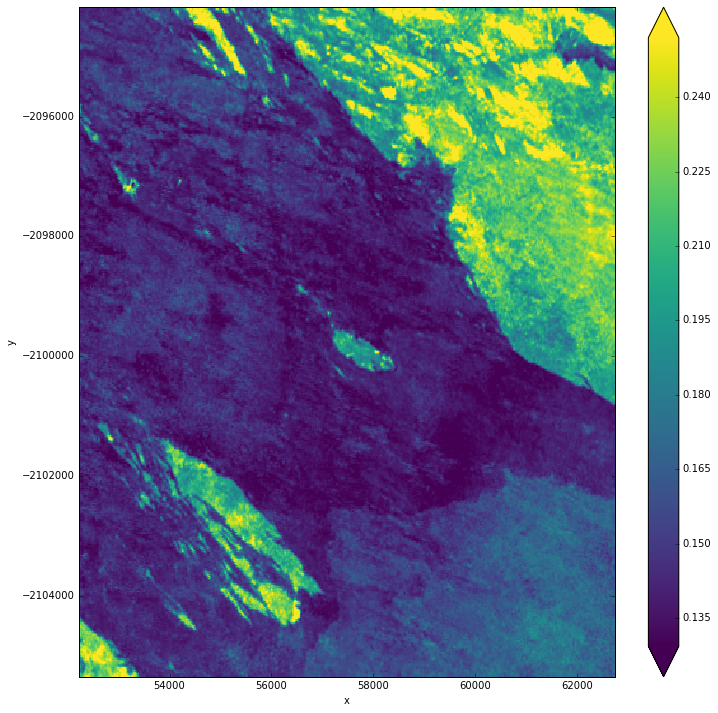

In [58]:
plt.figure(figsize=(12,12))
# mask (syn_ndvi >0.3).plot(robust=True) # cmap=acmap)

syn_ndvi.plot(robust=True) # cmap=acmap)

In [59]:
# set a datetime, try to make a dim as virtual datetime
# syn_band.attrs['time']='2014-00-00'
# export_datasets(syn_band, fnpref)

In [60]:

filename=os.path.join("/short/v10/fxz547/LowNDVI",AOI_NAME+'_ls8_nbar_syndata_refined.tiff')

write_geotiff(filename, syndata2 ) #, time_index=None, profile_override=None)


In [61]:
# this function is Not working


# def make_rgb(data):
#     """ data must have three measurements R G B
#     https://github.com/data-cube/agdc-v2/blob/develop/examples/notebooks/Datacube_Summary.ipynb
#     https://localhost:5999/notebooks/geodanalytics/localz/agdcv2_display_RGB_images.ipynb#Select-a-stack-of-images,-mask-off-invalid-pixels,-make-RGB-natural-color-images
#     https://localhost:5999/notebooks/geodanalytics/BareSoil/export_near_cloudfree_landsat_imagery_stack.ipynb
#     """
#     fake_saturation = 3500 #4000
#     rgb = data.to_array(dim='color')
#     rgb = rgb.transpose(*(rgb.dims[1:]+rgb.dims[:1]))  # make 'color' the last dimension
#     rgb = rgb.where((rgb <= fake_saturation).all(dim='color'))  # mask out pixels where any band is 'saturated'
#     rgb /= fake_saturation  # scale to [0, 1] range for imshow

#     # rgb.plot.imshow(x=data.crs.dimensions[1], y=data.crs.dimensions[0],
#     #                 col='time', col_wrap=5, add_colorbar=False)
#     rgb.plot.imshow(x=data.crs.dimensions[1], y=data.crs.dimensions[0],
#                     col='time', col_wrap=5, add_colorbar=False)
    
#     return rgb

In [69]:

def scale_array2(arr, fake_saturation=3500):
    """
    Linearly scales array 'arr' clippoff fake_saturation value. 
    If the surf reflectance value is too large, it will be set as fake_saturation.
    What happen to the -999 values?
    
    return scaled  2D array image with value in (0,255)
    """
    
    clipped_arr= arr.where(arr<fake_saturation).fillna(fake_saturation)
   
    return (255*clipped_arr)/fake_saturation


def make_rgb_image(bands,outfname=None, fake_saturation = 3500):
    """
    Create a RGB image using bands.{red,green,blue}
    """
    print ("Start making RGB image  ")
        
    plt.figure( figsize=(10,10) )
    
    red_img=bands.red
    green_img=bands.green
    blue_img = bands.blue
    
    y_size = red_img.shape[0]; x_size = red_img.shape[1]

    print("Red image shape and y,x size", red_img.shape,y_size,x_size)

    
    rgb_image = np.zeros((y_size, x_size, 3), dtype='uint8')
    
    #rgb_image = np.zeros((y_size, x_size, 3), dtype='int16') #not work int16	-32,768 to 32,767

 
#     fake_saturation = 3500
    rgb_image[:,:,0] = scale_array2(red_img,fake_saturation)
    rgb_image[:,:,1] = scale_array2(green_img,fake_saturation)
    rgb_image[:,:,2] = scale_array2(blue_img,fake_saturation)
    
    strDate="yyy-mm-dd"   #str(nbar.time.values[itime])[:10]
    title_str= 'Landsat Image %s'%(strDate)
    plt.title(title_str)
    plt.ylabel('Northing'); plt.xlabel('Easting');
    
    if outfname is None:
        plt.imshow(rgb_image)
        output_figure_name = 'nbar_nature_color.png'
        plt.savefig(output_figure_name, dpi=400)
    else:
        plt.imsave(outfname, rgb_image)  #only the image would NOT save the title and axis label
        plt.close()
    


Start making RGB image  
('Red image shape and y,x size', (447, 421), 447, 421)


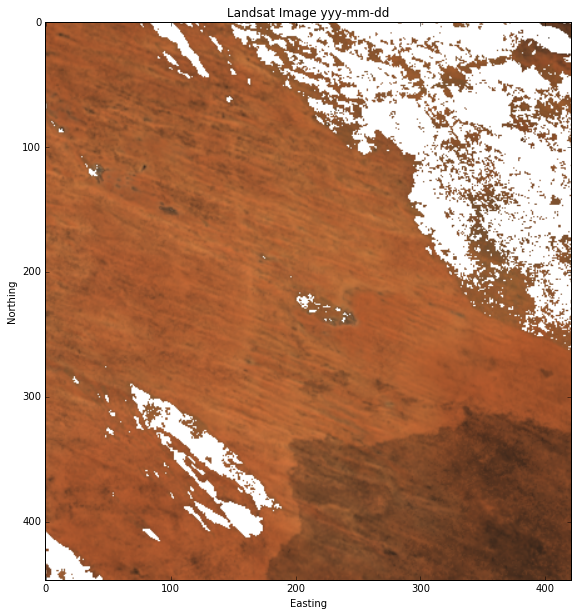

In [63]:
rgb= make_rgb_image(syndata2)

Start making RGB image  
('Red image shape and y,x size', (447, 421), 447, 421)


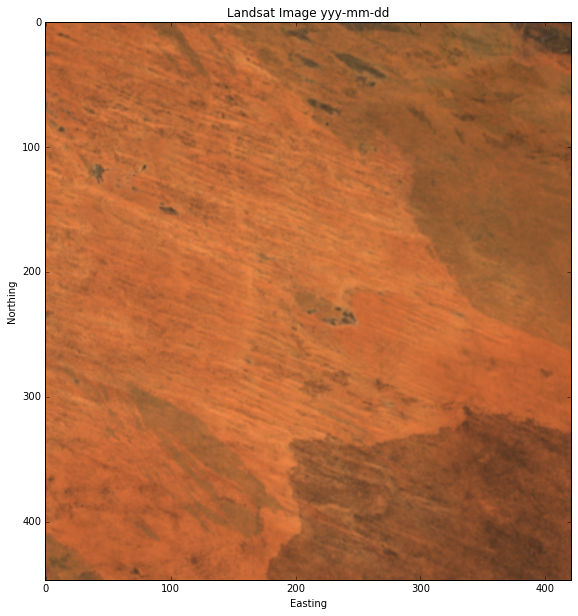

In [72]:
# syn_band was defined above as mean()
rgb= make_rgb_image(syn_band,fake_saturation = 3000)